# Sklearn Workshop

14:26 - 15:59

# 1. ETL
- load the data

# 2. EDA
- output: top three features

# 3. Feature selection/extraction
- set X, and y
- train test split

# 4. Clean data
- clean missing values
- transfer categorical values to numbers
  - label encoder and one-hot encoder(get_dummy)

# 5. Modeling
- cross validation -> grid search
- this problem is a classification problem
  - use RandomForestClassifer, SVC, LogisticRegression, GaussianNB

# 6. Testing
- `.predict`
- use from sklearn.metrics import accuracy
- use from sklearn.metrics import classification_report
  - don't worry about what is recall, precision, f1
    - i will explain later....

# 7. Feature importance
- can you try

# 8. Save models

## 0. ETL

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("brain_stroke.csv")

In [4]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,NaN,29.0,formerly smoked,1


In [5]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4978.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.904632,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.044911,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.207500,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.850000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4975 non-null   object 
 6   Residence_type     4977 non-null   object 
 7   avg_glucose_level  4978 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [7]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            6
Residence_type       4
avg_glucose_level    3
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### summarize ETL
- load data successful 
- 5 data are obj
- 3 column have Null

## 1. EDA

In [8]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4978.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.904632,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.044911,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.207500,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.850000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [9]:
count_title = ['age','avg_glucose_level','bmi']

### - cont values look fine

In [10]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [11]:
df.gender.value_counts()

Female    2907
Male      2074
Name: gender, dtype: int64

In [12]:
df.ever_married.value_counts()

Yes    3280
No     1701
Name: ever_married, dtype: int64

In [13]:
df.work_type.value_counts()

Private          2856
Self-employed     803
children          673
Govt_job          643
Name: work_type, dtype: int64

In [14]:
df.Residence_type.value_counts()

Urban    2532
Rural    2445
Name: Residence_type, dtype: int64

In [15]:
df.smoking_status.value_counts()

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

### - discrete values also okay ;-;
<br>

## univariable analysis

<br>

## - plot the dis plot or count plot

/Users/atichetsurakul/opt/anaconda3/envs/ai50/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

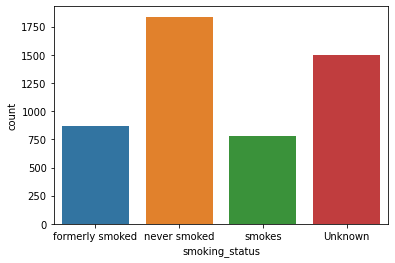

In [16]:
sns.countplot(df.smoking_status)

/Users/atichetsurakul/opt/anaconda3/envs/ai50/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Residence_type', ylabel='count'>

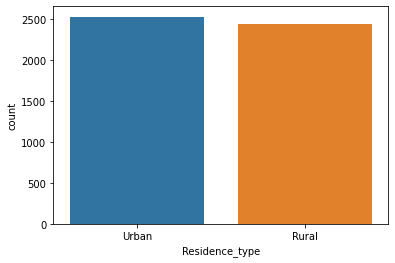

In [17]:
sns.countplot(df.Residence_type)

/Users/atichetsurakul/opt/anaconda3/envs/ai50/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='work_type', ylabel='count'>

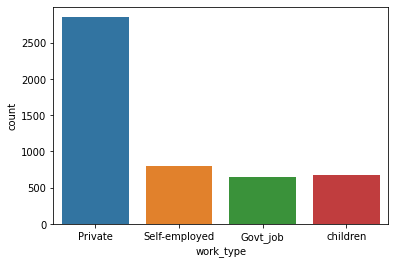

In [18]:
sns.countplot(df.work_type)

/Users/atichetsurakul/opt/anaconda3/envs/ai50/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hypertension', ylabel='count'>

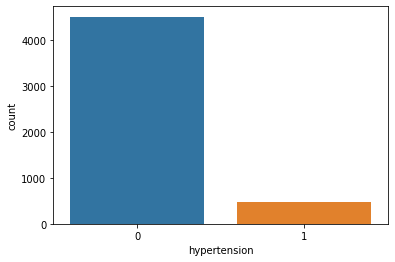

In [19]:
sns.countplot(df.hypertension)

/Users/atichetsurakul/opt/anaconda3/envs/ai50/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

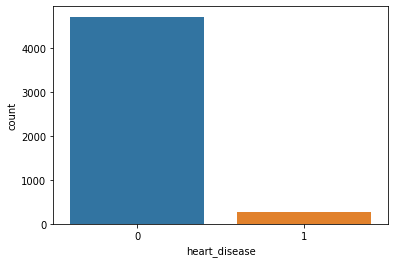

In [20]:
sns.countplot(df.heart_disease)

/Users/atichetsurakul/opt/anaconda3/envs/ai50/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ever_married', ylabel='count'>

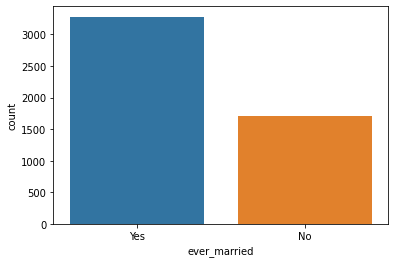

In [21]:
sns.countplot(df.ever_married)

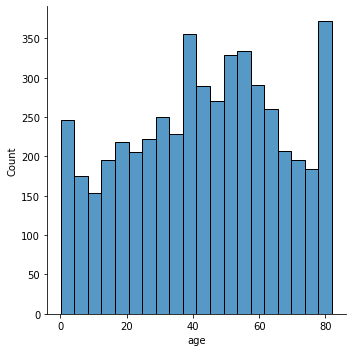

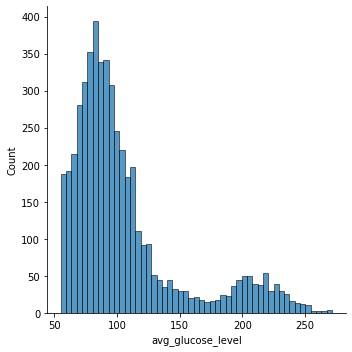

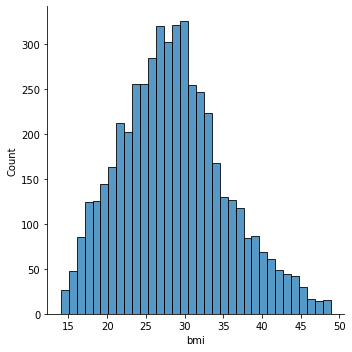

In [22]:
for i in count_title:
    sns.displot(df[i])

### summarize from personal bias and univarable >> every thing might useable
<br>

### Multivarable analysis

<AxesSubplot:>

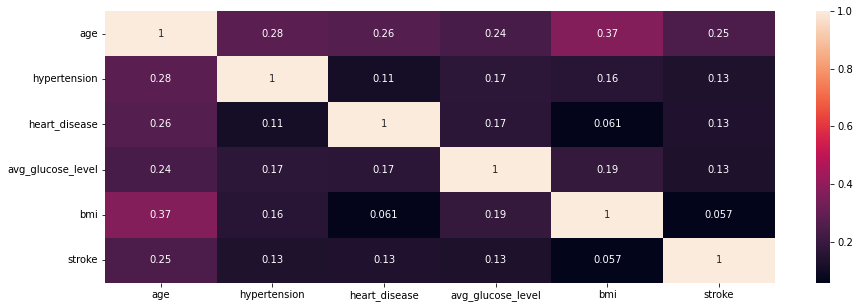

In [23]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(), annot=True)

##### hard to predict by this maybe?

age > hypertension == heart_disease == glucose_lv > bmi

### try with sime discreate value columns


In [24]:
dis_title = [df.ever_married,df.heart_disease,df.hypertension,df.work_type,df.Residence_type,df.smoking_status]

/Users/atichetsurakul/opt/anaconda3/envs/ai50/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='heart_disease', ylabel='stroke'>

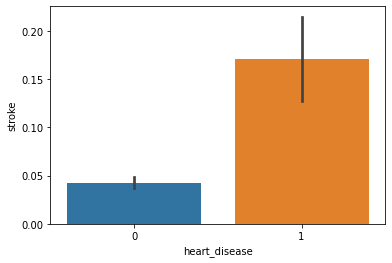

In [25]:
sns.barplot(df.heart_disease,df.stroke)

/Users/atichetsurakul/opt/anaconda3/envs/ai50/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ever_married', ylabel='stroke'>

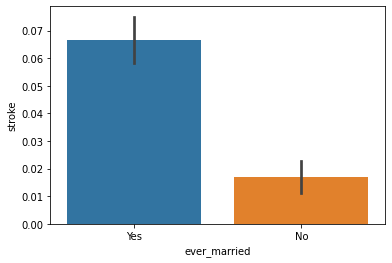

In [26]:
sns.barplot(df.ever_married,df.stroke)

/Users/atichetsurakul/opt/anaconda3/envs/ai50/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='work_type', ylabel='stroke'>

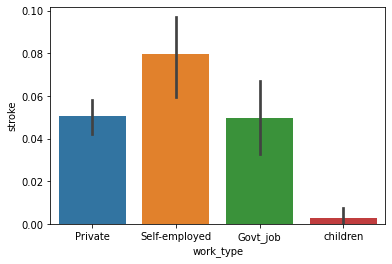

In [27]:
sns.barplot(df.work_type,df.stroke)

/Users/atichetsurakul/opt/anaconda3/envs/ai50/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking_status', ylabel='stroke'>

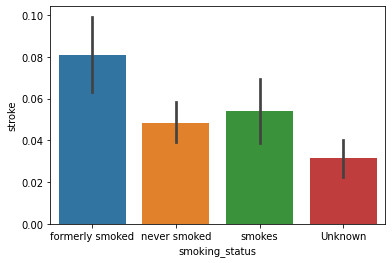

In [28]:
sns.barplot(df.smoking_status,df.stroke)

/Users/atichetsurakul/opt/anaconda3/envs/ai50/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='smoking_status'>

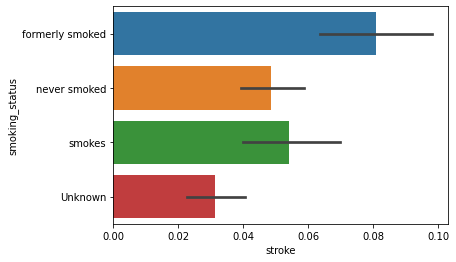

In [29]:
sns.barplot(df.stroke,df.smoking_status)

## EDA conclude is hard for any to use on this

<br>

- every discreate value columns are all bad ,since stroke less than 0.1 gap
- age > hypertension == heart_disease == glucose_lv
#####  - fourth of these seem to be quite bad but bestest

<br><br>

## 2. Preprocessing / Cleaning
- all selected are continuous values so dont mind labeling

In [30]:
df.isna().sum()


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            6
Residence_type       4
avg_glucose_level    3
bmi                  0
smoking_status       0
stroke               0
dtype: int64

- only thing needed to be clean are `avg_glucose_level`
- suddenly teacher said that he is going to use `smoke status` , so I do copycat

In [31]:
# use one hot encoder on the smoke status
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()
df['hotdogsmoke'] = le.fit_transform(df.smoking_status)


# OR 

### this is the best
if False:
    df = pd.get_dummies(new_df, columns=['smoking_status'], drop_first=True)


## ^ ^ ^ the pd.get_dummies(...) is one hot encoding which is th best thing that need 

In [33]:
df['hotdogsmoke'].unique()

array([1, 2, 3, 0])

#### all things are value now then let fill na()

In [34]:
df.avg_glucose_level.describe()

count    4978.000000
mean      105.904632
std        45.044911
min        55.120000
25%        77.207500
50%        91.850000
75%       113.850000
max       271.740000
Name: avg_glucose_level, dtype: float64

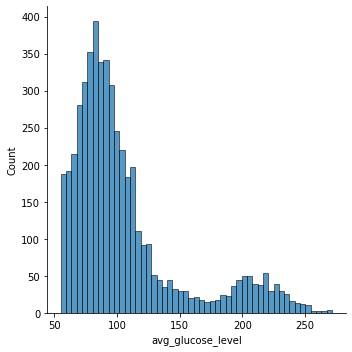

In [35]:
sns.displot(df.avg_glucose_level)

> ### decide to fill with median

In [36]:
# not yet fill

## A big problem: our data has imbalanced data!


In [89]:
df['stroke'].value_counts()


0    4733
1     248
Name: stroke, dtype: int64

In [90]:
#many ways to fix imbalances, but we gonna take only 248 for class 0

#1. create the df with class = 1
stroke_1 = df.loc[df['stroke'] == 1]
stroke_1.shape
stroke_0 = df.loc[df['stroke'] == 0].sample(n=248, random_state=999)
stroke_0.shape
new_df = pd.concat([stroke_1, stroke_0])
new_df['stroke'].value_counts()

1    248
0    248
Name: stroke, dtype: int64

### Have too much X but anyway 

In [37]:
X = df[['age','hypertension','heart_disease','avg_glucose_level','hotdogsmoke']]
y=df.stroke
assert X.shape[0] > 0
assert X.shape[1] > 0

In [91]:
from sklearn.model_selection import train_test_split

X = new_df[['age','hypertension','heart_disease','avg_glucose_level','hotdogsmoke']]
y=new_df.stroke

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=112)

In [92]:
# using with balanced data


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=112)

In [93]:
X_train.shape,y_train.shape

((347, 5), (347,))

In [94]:
X_test.shape,y_test.shape

((149, 5), (149,))

In [95]:
X_train.isna().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    3
hotdogsmoke          0
dtype: int64

In [96]:
# from upper we decided to fill na with median
X_train.avg_glucose_level.fillna(X_train.avg_glucose_level.median(),inplace=True)

In [97]:
if X_test.isna().sum().avg_glucose_level > 0:
    X_test.avg_glucose_level.fillna(X_test.avg_glucose_level.median(),inplace=True)

In [98]:
X_train.isna().sum(),X_test.isna().sum()

(age                  0
 hypertension         0
 heart_disease        0
 avg_glucose_level    0
 hotdogsmoke          0
 dtype: int64,
 age                  0
 hypertension         0
 heart_disease        0
 avg_glucose_level    0
 hotdogsmoke          0
 dtype: int64)

> ### Scailing

In [99]:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

## 3 . Modelling

### 3.1 cross validation
- with model = RandomForestClassifier,SVC,LogisticRegression,GaussianNB


In [100]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle=True)

In [101]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

#data -> algorithm -> model

#Exercise: print out the r2 and RMSE for me
#put the RMSE and r2 for RandomForestRegressor in the chat....
#16:30 - 16:45

#2. create the object of the algorithm
rc = RandomForestClassifier()  #n_jobs=-1 means i gonna use the full power of my PC
svc = SVC()
lr = LogisticRegression()
nb = GaussianNB()

#3. call .fit(X_train, y_train) to learn the patterns
# model.fit(X_train, y_train)

#import the cross validation function
from sklearn.model_selection import cross_val_score


#many ways for cv, go check at sklearn.model_selection, e.g., StratifiedFold
#run that function, finish!
#format: cross_val_score(model, xtrain, ytrain, cv=kfold(5), scoring='accuracy')


models = [rc,svc,lr,nb]
scores = []
for model in models:    
        scores.append(
        cross_val_score(model, X_train, y_train, cv=kf, 
                         scoring='neg_mean_squared_error')
                  ) #try scoring='r2'

print(scores,sep='\n')

[array([-0.3       , -0.22857143, -0.36231884, -0.33333333, -0.26086957]), array([-0.31428571, -0.28571429, -0.2173913 , -0.27536232, -0.1884058 ]), array([-0.27142857, -0.31428571, -0.2173913 , -0.30434783, -0.23188406]), array([-0.27142857, -0.37142857, -0.27536232, -0.27536232, -0.30434783])]


## 3.2 GRID search

In [120]:
from sklearn.model_selection import GridSearchCV
#RandomSearchCV is a faster version

#2. define the search space
#is a dictionary: key(param): value(value)
#go to google and search sklearn RandomForestRegressor, see how many parameters
#what is the idea: no idea - just loop everything
param_grid_rc = {
    'max_depth' : [5, 10],
    'n_estimators' : [5, 6, 7, 8, 9, 10],
    'max_features' : ['auto', 'log2'],
}
#how many combinations? --> 24 combinations
param_grid_svc = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
rc = RandomForestClassifier(random_state=999)  #n_jobs=-1 means i gonna use the full power of my PC
svc = SVC()
lr = LogisticRegression()
nb = GaussianNB()

#3. define the model you want to search with
estimator = svc
estimators = [rc,svc]
params = [param_grid_rc,param_grid_svc]
#4. define the gridsearch object with the search space
grid = GridSearchCV(estimator  = estimator,
                    param_grid = param_grid_svc,
                    cv = 5,  #by default, it uses kfold anyway; 5 here means 5 fold
                    n_jobs  = -1,
                    refit   = True, #refits means, after 24 loops, it will fit the best version again!, so grid = best model
                    scoring = '`balanced_accurac\
                        `  ',
                    return_train_score=True)

#5. run the search
grid.fit(X_train, y_train)  #why training set???

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True, scoring='balanced_accuracy')

In [121]:
#after you run, you can check many things:

#best parameters
print(f"Best params: {grid.best_params_}")

#best mse (score)
print(f"Best mse: {grid.best_score_}")

#you can retrieve the best model (basically the model trained the best_params_)
print(f"Best estimator: {grid.best_estimator_}")  #but you DON'T NEED THIS, because the `grid` itself is already 
#the best model, because of refit=True

Best params: {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Best mse: 0.7613445378151261
Best estimator: SVC(C=10, gamma=1, kernel='linear')


In [115]:
X_train[:1]

array([[ 1.20109861, -0.47555064, -0.35068126, -0.97394025,  0.57636528]])

In [116]:
data = np.array([[-1.3984415, -0.42444284, -0.63741027,  1.06274229, -1.86429484]])
result = grid.predict(data)
result

array([0])

## 4. Inferencing testing


In [117]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
from sklearn.metrics import accuracy_score



In [118]:
yhat = grid.predict(X_test)
MSE  = mean_squared_error(y_test, yhat)
RMSE = math.sqrt(MSE)
MAE  = mean_absolute_error(y_test, yhat)

MSE, RMSE, MAE


(0.18120805369127516, 0.42568539285636187, 0.18120805369127516)

In [119]:
accuracy_score(y_test, yhat)


0.8187919463087249

## 5. Features importance

In [110]:
X

,age,hypertension,heart_disease,avg_glucose_level,hotdogsmoke
0,67.0,0,1,228.69,1
1,80.0,0,1,105.92,2
2,49.0,0,0,171.23,3
3,79.0,1,0,174.12,2
4,81.0,0,0,NaN,1
...,...,...,...,...,...
4523,31.0,0,0,90.29,0
1162,43.0,0,0,101.75,3
774,53.0,0,0,189.49,0
3911,59.0,0,0,115.68,0


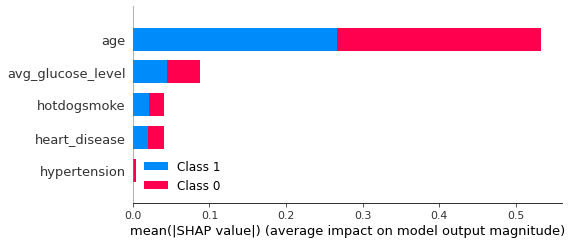

In [111]:
import shap

#2. create the shap explainer
explainer = shap.TreeExplainer(grid.best_estimator_)

#3. run the shap! 
shap_values = explainer.shap_values(X_test)
#print(shap_values)

#4. plot!
#format: shap.summary_plot(shap_values, X_test, plot_type, features_names)
shap.summary_plot(shap_values, X_test, plot_type='bar', feature_names = ['age','hypertension','heart_disease','avg_glucose_level','hotdogsmoke'])